# Recommendation System

#Importing the Libraries

In [97]:
import os
os.chdir('../src/')

import pandas
import numpy
#import dask.dataframe as dd

# For Graphical Plots
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


import utilities
from importlib import reload
import utilities
utilities = reload(utilities)

#Loading Data

In [98]:
MAX_ROWS = 10000
#df_raw_train = pandas.read_csv("../data/raw/train_ver2.csv", usecols=['fecha_dato','ncodpers', 'sexo', 'antiguedad', 'age', 'renta'], nrows=MAX_ROWS)
#df_raw_train= dd.read_csv("../data/raw/train_ver2.csv",dtype={'age': object,
#                        'antiguedad': object,
#                       'cod_prov': float,
#                       'ind_actividad_cliente': float,
#                       'ind_nom_pens_ult1': float,
#                        'ind_nomina_ult1': float,
#                        'ind_nuevo': float,
#                       'indrel': float,
#                        'tipodom': float,
#                        'ult_fec_cli_1t': object,
#                        'conyuemp': object,
#                        'indrel_1mes': object })

df_raw_train = pandas.read_csv("../data/raw/train_ver2.csv", nrows=MAX_ROWS)
df_raw_test = pandas.read_csv("../data/raw/test_ver2.csv", nrows=MAX_ROWS )

In [99]:
df_raw_train.shape

(1000, 48)

In [100]:
df_raw_train.iloc[0]

fecha_dato                      2015-01-28
ncodpers                           1375586
ind_empleado                             N
pais_residencia                         ES
sexo                                     H
age                                     35
fecha_alta                      2015-01-12
ind_nuevo                              0.0
antiguedad                               6
indrel                                 1.0
ult_fec_cli_1t                         NaN
indrel_1mes                            1.0
tiprel_1mes                              A
indresi                                  S
indext                                   N
conyuemp                               NaN
canal_entrada                          KHL
indfall                                  N
tipodom                                1.0
cod_prov                              29.0
nomprov                             MALAGA
ind_actividad_cliente                  1.0
renta                              87218.1
segmento   

In [101]:
# type 5 samples per columns
for col in df_raw_train.columns:
    print('{}\n'.format(df_raw_train[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel_1mes, d

In [102]:
df_raw_train.isnull().sum()

fecha_dato                  0
ncodpers                    0
ind_empleado                1
pais_residencia             1
sexo                        1
age                         0
fecha_alta                  1
ind_nuevo                   1
antiguedad                  0
indrel                      1
ult_fec_cli_1t            999
indrel_1mes                 1
tiprel_1mes                 1
indresi                     1
indext                      1
conyuemp                 1000
canal_entrada               1
indfall                     1
tipodom                     1
cod_prov                    1
nomprov                     1
ind_actividad_cliente       1
renta                     165
segmento                    1
ind_ahor_fin_ult1           0
ind_aval_fin_ult1           0
ind_cco_fin_ult1            0
ind_cder_fin_ult1           0
ind_cno_fin_ult1            0
ind_ctju_fin_ult1           0
ind_ctma_fin_ult1           0
ind_ctop_fin_ult1           0
ind_ctpp_fin_ult1           0
ind_deco_f

In [103]:
columns = ['fecha_dato', 'ncodpers', 'sexo', 'antiguedad', 'age', 'renta'] + list(df_raw_train.columns[24:-4])
df_train = df_raw_train[columns].copy()

# Cleaning antiguedad
df_train = utilities.impute_median(df_train, 'antiguedad')
# Cleaning age
df_train = utilities.impute_median(df_train, 'age')
# cleaning sex
df_train['sexo'] = df_train['sexo'].fillna('H')
# clean income imputing median
df_train['renta'] = df_train['renta'].fillna(df_train['renta'].dropna().median())

# make dummies for sexo
df_train['sexo'] = pandas.get_dummies(df_train['sexo'], drop_first=True)

In [104]:
#columns = ['ncodpers', 'sexo', 'antiguedad', 'age', 'renta'] + list(df_raw_train.columns[24:-4])
#df_train = df_raw_train[columns].copy()

# Cleaning antiguedad
#df_train['antiguedad'] = utilities.impute_median(df_train, 'antiguedad')
# Cleaning age
#df_train['age'] = utilities.impute_median(df_train, 'age')
# cleaning sex
#df_train['sexo'] = df_train['sexo'].fillna('H')
# clean income imputing median
#df_train['renta'] = df_train['renta'].fillna(df_train['renta'].dropna().median())

# make dummies for sexo
#df_train['sexo'] = pandas.get_dummies(df_train['sexo'], drop_first=True)


# preparation missing data with fixed value or average or ...

# replace NaN with 0
#train.fillna(0)

# replace NaN with 0 and change the train dataframe
#train.fillna(0, inplace=True)

# replace NaN with 0 and change the train dataframe and in columns axis 
#train.fillna(0, axis=1, inplace=True)

# replace NaN with averae value
#train.fillna(train['columns'].mean())

# replace NaN with next value
#train.fillna(method='ffill')

# replace NaN with before value
#train.fillna(method='bfill')
# 

In [105]:
df_train.isnull().sum()

fecha_dato           0
ncodpers             0
sexo                 0
antiguedad           0
age                  0
renta                0
ind_ahor_fin_ult1    0
ind_aval_fin_ult1    0
ind_cco_fin_ult1     0
ind_cder_fin_ult1    0
ind_cno_fin_ult1     0
ind_ctju_fin_ult1    0
ind_ctma_fin_ult1    0
ind_ctop_fin_ult1    0
ind_ctpp_fin_ult1    0
ind_deco_fin_ult1    0
ind_deme_fin_ult1    0
ind_dela_fin_ult1    0
ind_ecue_fin_ult1    0
ind_fond_fin_ult1    0
ind_hip_fin_ult1     0
ind_plan_fin_ult1    0
ind_pres_fin_ult1    0
ind_reca_fin_ult1    0
ind_tjcr_fin_ult1    0
ind_valo_fin_ult1    0
dtype: int64

In [106]:
df_train.columns

Index(['fecha_dato', 'ncodpers', 'sexo', 'antiguedad', 'age', 'renta',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1'],
      dtype='object')

In [107]:
X_train = df_train.loc[:, ['sexo', 'antiguedad', 'age', 'renta']]
y_train = df_train['ind_ahor_fin_ult1']

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [108]:
X_train = df_train.loc[:, ['sexo', 'antiguedad', 'age', 'renta']]
y_train = df_train['ind_ahor_fin_ult1']

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [109]:
pred = clf.predict(X_train)

In [110]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
product_columns = [c for c in df_train.columns if c.startswith('ind') and c.endswith('ult1')]

models = []

known_variable = []
for p in product_columns:
    X_train = df_train.loc[:, ['sexo', 'antiguedad', 'age', 'renta']]
    y_train = df_train[p]

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    models.append(clf)
    known_variable = X_train.columns

In [112]:
df_test = df_raw_test[known_variable].copy()
df_test.isnull().sum()

# Cleaning antiguedad
#df_test = utilities.impute_median(df_test, 'antiguedad')
# Cleaning age
#df_test = utilities.impute_median(df_test, 'age')
# cleaning sex
df_test['sexo'] = df_test['sexo'].fillna('H')
# clean income imputing median
df_test = utilities.impute_median(df_test, 'renta')

# make dummies for sexo
df_test['sexo'] = pandas.get_dummies(df_test['sexo'], drop_first=True)

In [113]:
models[3].predict(df_test[known_variable])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [114]:
collect_predictions = []
for m in models:
    collect_predictions.append(m.predict(df_test[known_variable]))

In [115]:
collect_predictions

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [117]:


#Cross Validation for Randam forest classifier

#clf = RandomForestClassifier(max_depth=2, random_state=0)
cv_results = cross_validate(clf, X_train, y_train, cv=10, scoring=['accuracy'])
scores = cv_results['test_accuracy']
print(f"Scores = {scores}, {scores.mean()}, {scores.std()}")


Scores = [1.   1.   1.   1.   1.   0.99 0.99 0.99 0.99 0.99], 0.9949999999999999, 0.0050000000000000044


In [118]:
numpy.unique(df_test[known_variable])


array([False, True, 4, 5, 7, 11, 13, 15, 16, 18, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       62, 63, 64, 66, 67, 71, 72, 73, 88, 90, 256, 9871, 19689, 21044,
       21617, 21705, 22007, 22907, 23667, 23822, 24365, 25135, 26519,
       26547, 26936, 26986, 27509, 27593, 27644, 28884, 30264, 30862,
       31784, 32038, 32506, 32606, 32642, 32997, 33458, 34012, 34313,
       34332, 34823, 34841, 35089, 35155, 35746, 36217, 36699, 36835,
       37036, 37090, 37367, 37606, 37961, 37978, 38161, 38224, 38508,
       38676, 38894, 38926, 39223, 39327, 39630, 39938, 40196, 40245,
       40749, 40820, 40821, 41400, 41446, 41488, 41678, 41712, 42096,
       42787, 42953, 43020, 43392, 43443, 43767, 44047, 44710, 44809,
       44909, 44928, 44948, 45379, 45388, 45544, 45616, 46156, 46415,
       46505, 46568, 46735, 46823, 47177, 47182, 47215, 47322, 47332,
     

In [119]:
#model Evaluation
rforest_acc = accuracy_score(pred, y_train)
print("Training Accuracy score is:", rforest_acc*100)


Training Accuracy score is: 99.5


In [120]:
df_predictions = pandas.DataFrame(numpy.array(collect_predictions).T, columns=product_columns)
df_predictions['ncodpers'] = df_raw_test['ncodpers']
result = []

for df_p in df_predictions.iterrows():
    cur_row = [df_p[1]['ncodpers'], ' '.join(list(df_p[1][df_p[1] == 1].keys()))]
    result.append(cur_row)

In [121]:
pandas.DataFrame(result, columns=['ncodpers', 'added_products']).to_csv("../data/final/submission.csv", index=False)

Logistic Regression Model Tranning:

In [122]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [123]:
pred1 = logreg.predict(X_train)

In [124]:
pred1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [125]:
product_columns = [c for c in df_train.columns if c.startswith('ind') and c.endswith('ult1')]

models = []

known_variable = []
for p in product_columns:
    X_train = df_train.loc[:, ['sexo', 'antiguedad', 'age', 'renta']]
    y_train = df_train[p]

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    models.append(clf)
    known_variable = X_train.columns

In [126]:
df_test = df_raw_test[known_variable].copy()
df_test.isnull().sum()

# Cleaning antiguedad
# df_test = impute_median(df_test, 'antiguedad')
# Cleaning age
# df_test = impute_median(df_test, 'age')
# cleaning sex
df_test['sexo'] = df_test['sexo'].fillna('H')
# clean income imputing median
df_test = utilities.impute_median(df_test, 'renta')

# Cleaning antiguedad
#df_test = utilities.impute_median(df_test, 'antiguedad')

# make dummies for sexo
df_test['sexo'] = pandas.get_dummies(df_test['sexo'], drop_first=True)

In [127]:
models[3].predict(df_test[known_variable])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [128]:
collect_predictions = []
for m in models:
    collect_predictions.append(m.predict(df_test[known_variable]))

In [129]:
collect_predictions

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [132]:
#Cross Validation for Logistic Regression Model


cv_results = cross_validate(logreg, X_train, y_train, cv=10, scoring=['accuracy'])
scores = cv_results['test_accuracy']
print(f"Scores = {scores}, {scores.mean()}, {scores.std()}")


Scores = [0.99 1.   1.   1.   1.   0.99 0.99 0.99 0.99 0.99], 0.994, 0.004898979485566361


In [133]:
#model Evaluation
logreg_acc = accuracy_score(pred1, y_train)
print("Test Accuracy score is:", logreg_acc*100)

Test Accuracy score is: 99.4


In [134]:
df_predictions = pandas.DataFrame(numpy.array(collect_predictions).T, columns=product_columns)
df_predictions['ncodpers'] = df_raw_test['ncodpers']
result = []

for df_p in df_predictions.iterrows():
    cur_row = [df_p[1]['ncodpers'], ' '.join(list(df_p[1][df_p[1] == 1].keys()))]
    result.append(cur_row)

In [135]:
pandas.DataFrame(result, columns=['ncodpers', 'added_products']).to_csv("../data/final/submission1.csv", index=False)

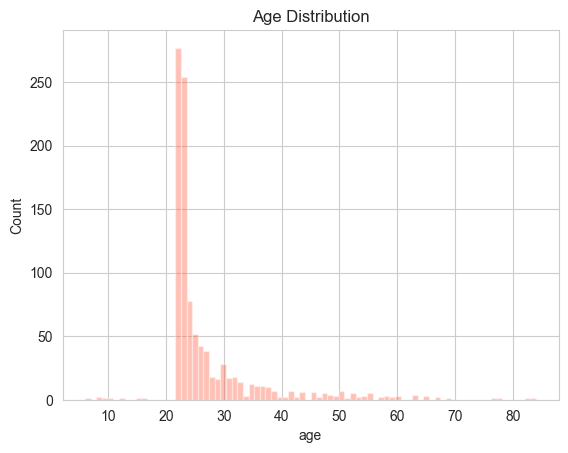

In [136]:
#with sn.plotting_context("notebook",font_scale=1.5):
sn.set_style("whitegrid")
sn.distplot(df_train["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
plt.title("Age Distribution")
plt.ylabel("Count")
plt.show()